In [1]:

!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scipy
!pip install seaborn
!pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Modules**

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
from pandas.plotting import autocorrelation_plot

High Level Descriptive Analysis of Data

In [6]:
# importing the data
raw_csv_data = pd.read_csv("Data-Chillers.csv")

In [7]:
df_comp = raw_csv_data.copy() # creating copy of the raw data

In [8]:
df_comp.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,29-08-2017 11:00,-0.015871,0.353986,-0.787655,0.008144
1,29-08-2017 12:00,-0.101576,0.353986,-0.787655,-0.029860
2,29-08-2017 13:00,-0.118241,0.353986,-0.787655,-0.021717
3,29-08-2017 14:00,-0.214262,0.353986,-0.787655,0.008144
4,29-08-2017 15:00,-0.249972,0.353986,-0.787655,-0.108583


In [9]:
df_comp.describe()

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
count,1895.000000,1895.000000,1895.000000,1895.000000
mean,-0.005885,0.003773,-0.011604,-0.026563
std,0.415492,0.820630,1.324344,0.405068
min,-1.603790,-3.115077,-3.281895,-1.468581
25%,-0.222198,-0.424783,-0.853293,-0.230738
50%,-0.022220,0.000000,0.065638,-0.065150
75%,0.190455,0.424783,0.787655,0.207664
max,1.406987,3.256671,4.397739,1.460437


In [10]:
df_comp.isna() #checking for nulls in df

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1890,False,False,False,False,False
1891,False,False,False,False,False
1892,False,False,False,False,False
1893,False,False,False,False,False


In [11]:
df_comp.isna().sum() # checking for count of null values in each column

time                  0
IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

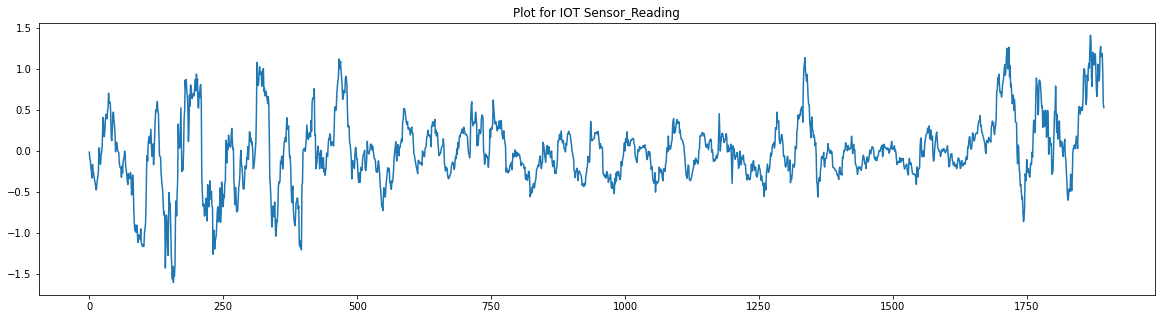

In [12]:
df_comp.IOT_Sensor_Reading.plot(figsize=(20,5), title="Plot for IOT Sensor_Reading")
plt.show() # on x-axis : count , on y-axis : range of IOT  Sensor_Reading

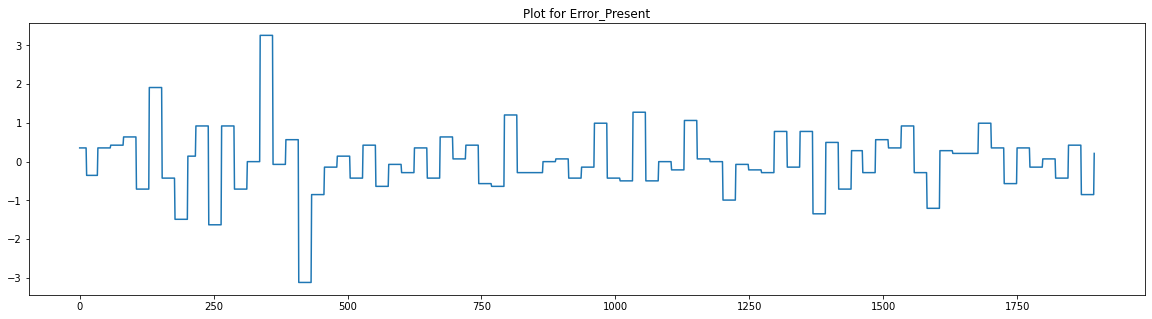

In [13]:
df_comp.Error_Present.plot(figsize=(20,5), title="Plot for Error_Present")
plt.show()

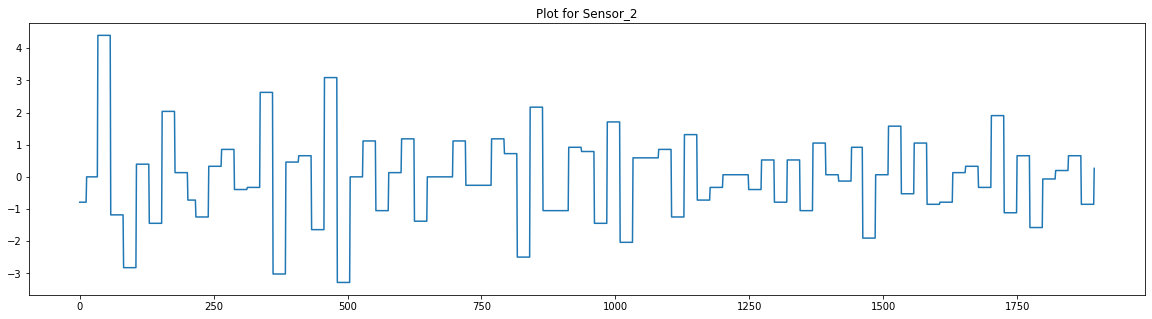

In [14]:
df_comp.Sensor_2.plot(figsize=(20,5), title="Plot for Sensor_2")
plt.show()

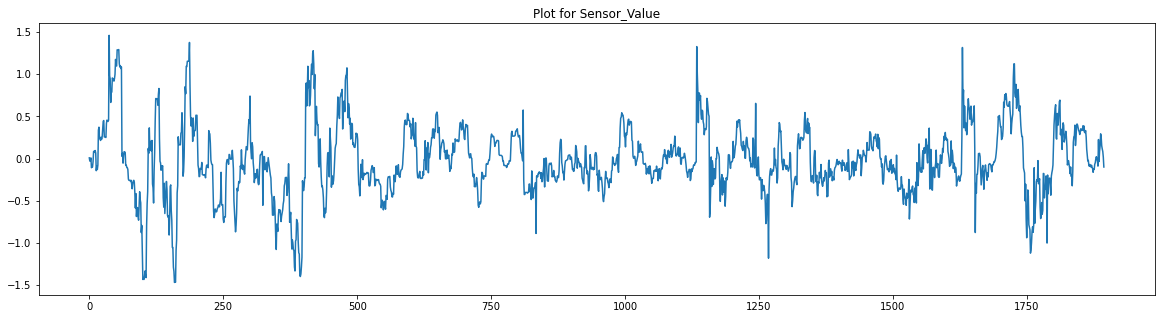

In [15]:
df_comp.Sensor_Value.plot(figsize=(20,5), title="Plot for Sensor_Value")
plt.show()

**QQ Plot**

In Statistics, Q-Q(quantile-quantile) plots is a graphically method to  compare two probability distributions by plotting their quantiles against each other. If the two distributions are exactly equal then the points on the Q-Q plot will perfectly lie on a straight line y = x.

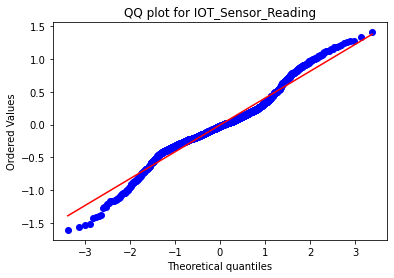

In [16]:
# The QQ plot
scipy.stats.probplot(df_comp.IOT_Sensor_Reading, plot=pylab)
plt.title("QQ plot for IOT_Sensor_Reading")
pylab.show()

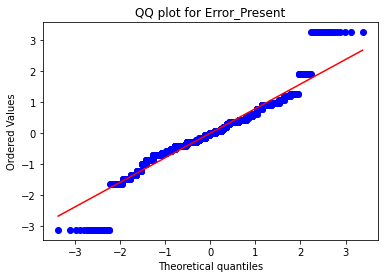

In [17]:
# The QQ plot
scipy.stats.probplot(df_comp.Error_Present, plot=pylab)
plt.title("QQ plot for Error_Present")
pylab.show()

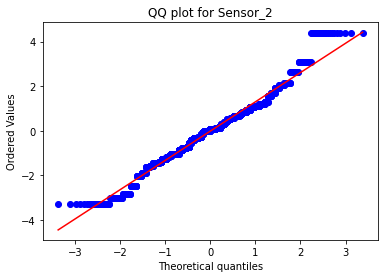

In [18]:
# The QQ plot
scipy.stats.probplot(df_comp.Sensor_2, plot=pylab)
plt.title("QQ plot for Sensor_2")
pylab.show()

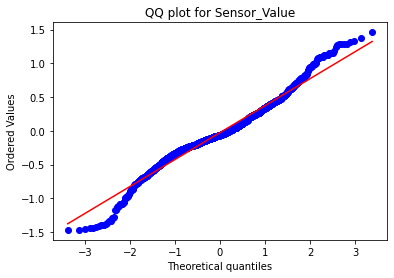

In [19]:
# The QQ plot
scipy.stats.probplot(df_comp.Sensor_Value, plot=pylab)
plt.title("QQ plot for Sensor_Value")
pylab.show()

**Data Preprocessing** 



*   **Formatting "Time" Column**




In [21]:
# taken as text field
df_comp.time.describe()

count                 1895
unique                1895
top       11-10-2017 20:00
freq                     1
Name: time, dtype: object

Here, we convert time column from string to datetime format, so that we don't get frequency as 1


In [22]:
df_comp.time = pd.to_datetime(df_comp.time, format='%d-%m-%Y %H:%M')

In [23]:
df_comp.head()

,time,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
0,2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
1,2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2,2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
3,2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
4,2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583


In [24]:
df_comp.time.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1895
unique                   1895
top       2017-09-18 16:00:00
freq                        1
first     2017-08-29 11:00:00
last      2017-11-17 00:00:00
Name: time, dtype: object

Observations:-

The frequency is corrected after converting time to datetime type, hence , we get start and end date of our df

In [25]:
## Setting the index
df_comp.set_index("time", inplace=True)

In [26]:
df_comp

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
time,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583
...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152




*   **Setting the desired frequency**




In [29]:
df_comp.asfreq('H') #setting frequency  as hourly

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value
time,,,,
2017-08-29 11:00:00,-0.015871,0.353986,-0.787655,0.008144
2017-08-29 12:00:00,-0.101576,0.353986,-0.787655,-0.029860
2017-08-29 13:00:00,-0.118241,0.353986,-0.787655,-0.021717
2017-08-29 14:00:00,-0.214262,0.353986,-0.787655,0.008144
2017-08-29 15:00:00,-0.249972,0.353986,-0.787655,-0.108583
...,...,...,...,...
2017-11-16 20:00:00,1.186376,-0.849566,-0.853293,0.152016
2017-11-16 21:00:00,1.182408,-0.849566,-0.853293,0.114012
2017-11-16 22:00:00,0.934023,-0.849566,-0.853293,0.084152


In [30]:
df_comp = df_comp.asfreq('H')

Observations:-

1. Here, we observe that on setting the frequency the number of records have increased from 1895 to 1910. This is because on setting up the frequency , time records which were previously not present (absent records are 3 hours of data per day) have been added in order to maintain the continuity.


*   **Handling the missing Values**

  There are 3 different methods for handling the missing values:- 

1.   Forward Filling : Forward filling means fill missing values with previous data. 
2.  Backward Filling: Backward filling means fill missing values with next data point.

3. Mean Filling: Mean filling means fill missing values with mean of data


In [31]:
df_comp.isna().sum()

IOT_Sensor_Reading    15
Error_Present         15
Sensor_2              15
Sensor_Value          15
dtype: int64

In [32]:
df_comp.IOT_Sensor_Reading = df_comp.IOT_Sensor_Reading.fillna(method="ffill")

In [33]:
df_comp.Error_Present = df_comp.Error_Present.fillna(method="bfill")

In [34]:
df_comp.Sensor_2 = df_comp.Sensor_2.fillna(method="bfill")

In [35]:
df_comp.Sensor_Value = df_comp.Sensor_Value.fillna(value=df_comp.Sensor_Value.mean())

In [37]:
df_comp.isna().sum() # handled missing values

IOT_Sensor_Reading    0
Error_Present         0
Sensor_2              0
Sensor_Value          0
dtype: int64

*   **Simplifying the dataset**



In [38]:
df_comp["IoT_Reading"] = df_comp.IOT_Sensor_Reading

In [39]:
df_comp.describe()

,IOT_Sensor_Reading,Error_Present,Sensor_2,Sensor_Value,IoT_Reading
count,1910.000000,1910.000000,1910.000000,1910.000000,1910.000000
mean,-0.003482,0.004300,-0.013471,-0.026563,-0.003482
std,0.416235,0.817652,1.320546,0.403473,0.416235
min,-1.603790,-3.115077,-3.281895,-1.468581,-1.603790
25%,-0.222198,-0.424783,-0.853293,-0.230738,-0.222198
50%,-0.020236,0.000000,0.065638,-0.061078,-0.020236
75%,0.191844,0.424783,0.787655,0.206307,0.191844
max,1.406987,3.256671,4.397739,1.460437,1.406987


In [40]:
del df_comp['IOT_Sensor_Reading']
del df_comp['Error_Present']
del df_comp['Sensor_2']
del df_comp['Sensor_Value']

In [41]:
df_comp.describe()

,IoT_Reading
count,1910.000000
mean,-0.003482
std,0.416235
min,-1.603790
25%,-0.222198
50%,-0.020236
75%,0.191844
max,1.406987


In [42]:
df_comp

,IoT_Reading
time,
2017-08-29 11:00:00,-0.015871
2017-08-29 12:00:00,-0.101576
2017-08-29 13:00:00,-0.118241
2017-08-29 14:00:00,-0.214262
2017-08-29 15:00:00,-0.249972
...,...
2017-11-16 20:00:00,1.186376
2017-11-16 21:00:00,1.182408
2017-11-16 22:00:00,0.934023


**White Noise**

White noise is an important concept in time series analysis and forecasting.

It is important for two main reasons:

1.  Predictability: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.

2.  Model Diagnostics: The series of errors from a time series forecast model should ideally be white noise.

White noise time series is defined by a zero mean, constant variance, and zero correlation. If our time series is white noise, it cannot be predicted/modeled.








In [43]:
# Sample White noise
wn = np.random.normal(loc=df_comp.IoT_Reading.mean(), scale=df_comp.IoT_Reading.std(), size=len(df_comp))

In [44]:
df_comp["wn"] = wn
df_comp.describe()

,IoT_Reading,wn
count,1910.000000,1910.000000
mean,-0.003482,-0.004331
std,0.416235,0.426037
min,-1.603790,-1.457273
25%,-0.222198,-0.295727
50%,-0.020236,-0.002178
75%,0.191844,0.280717
max,1.406987,1.457836


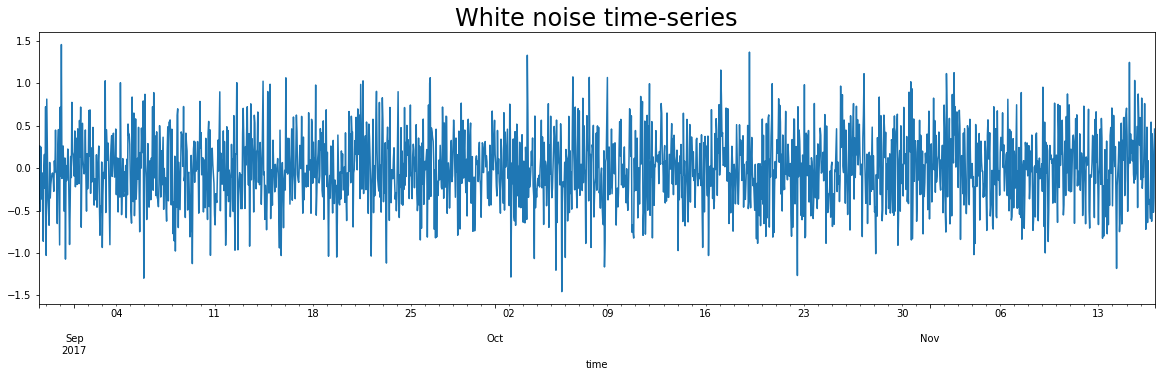

In [45]:
df_comp.wn.plot(figsize=(20,5))
plt.title("White noise time-series", size=24)
plt.show()
#here, we can observe that since it is white noise it doesn’t follow any pattern

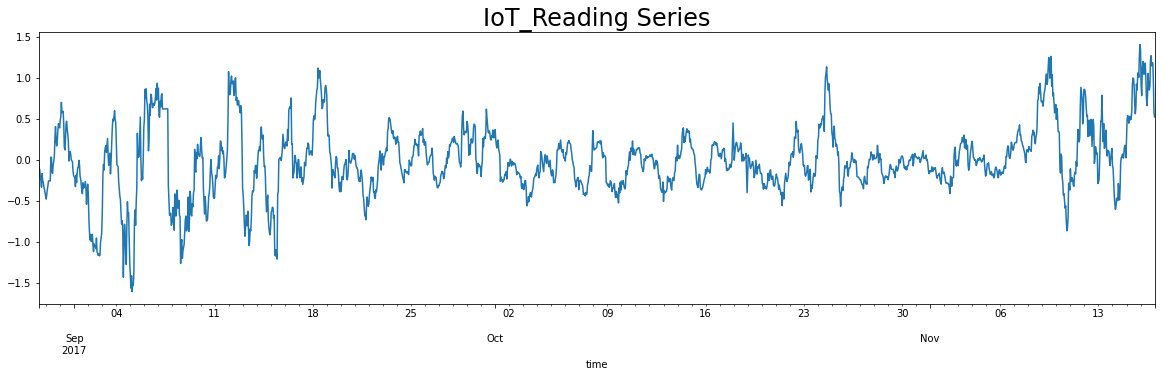

In [46]:
df_comp.IoT_Reading.plot(figsize=(20,5))
plt.title("IoT_Reading Series", size=24)
plt.show()

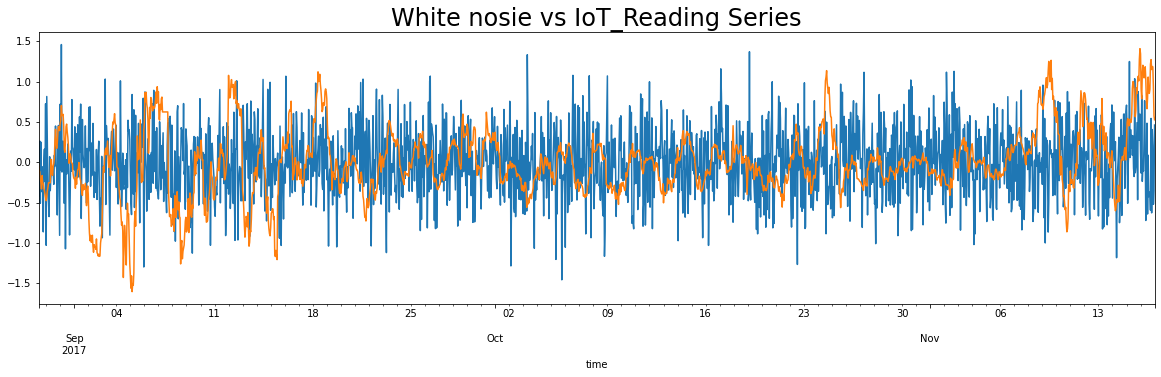

In [47]:
df_comp.wn.plot(figsize=(20,5))
df_comp.IoT_Reading.plot(figsize=(20,5))
plt.title("White nosie vs IoT_Reading Series", size=24)
plt.show()
# on overlapping the plots , we can observe that the plots resemble a lot and hence it might be inferred that the column can have white noise

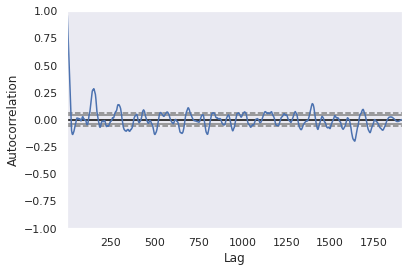

In [ ]:
autocorrelation_plot(df_comp.IoT_Reading)
plt.show()  
# Plot shows +ve correlation with lag values but here no significant relationship is seen with lag values. No Cycles/Trends
# We can infer from the autocorrelation plots that there might is no white noise as oppose to our initial assumption

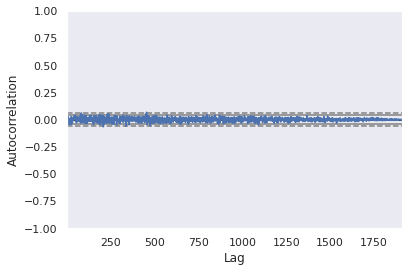

In [ ]:
autocorrelation_plot(df_comp.wn)
plt.show()

**Random Walk**


A random walk , which is not stationary in nature,  is an another time series model where the current observation is equal to the previous observation with a random step up or down.

It is a time series model Xt, such that Xt = Xt-1 + Wt, where Wt is discrete white noise series.

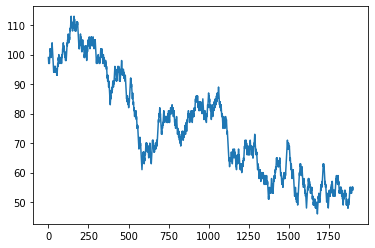

In [48]:
walk = [99]

for i in range(1900):
    # Create random noise
    noise = -1 if np.random.random() < 0.5 else 1
    walk.append(walk[-1] + noise)
    
plt.plot(walk)

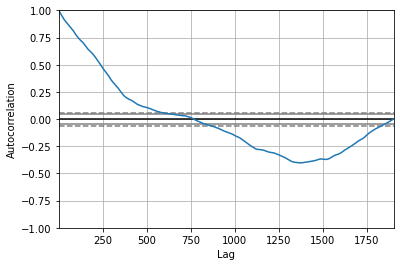

In [49]:
autocorrelation_plot(walk)
plt.show()


Observations:

We can observe that autocorrelation plots are differnet from the one plotted above, hence, the previously plooted plot is not random walk.

**Stationarity in Time Series**


The stationary time-series is the one which has no trend observed, fluctuates around the constant mean and has constant variance.
Covariance between different lags is constant and it doesn't depend on absolute location in time-series.

Checks for Stationarity:- 



1.   Visualization of plots : We can review a time series plot of the data and visually check if there are any obvious trends or seasonality.
2.   Summary Statistics: We can review the summary statistics for  data for seasons or random partitions and check for obvious or significant differences.

3.  Statistical Tests: We can use statistical tests to check if the expectations of stationarity are met or have been violated. 

Two mainly used statistical tests are:



*   Augmented Dickey-Fuller test
*   The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test

**AD fuller test**

* The Augmented Dickey-Fuller test is a type of statistical test called a unit root test and the intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

* In python, the statsmodel package is used for the  implementation of AD Fuller and KPSS test.

* The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary.

*  The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

*  Result is interpreted using the p-value from the test.

1.  p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit 
root and is non-stationary.
2.  p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [50]:
sts.adfuller(df_comp.wn)

(-45.145342024420735,
 0.0,
 0,
 1909,
 {'1%': -3.4337801282776335,
  '10%': -2.5675766377428086,
  '5%': -2.8630552063395585},
 2131.367748656987)

In [51]:
sts.adfuller(df_comp.IoT_Reading)

(-6.1107125661239845,
 9.347651207123894e-08,
 25,
 1884,
 {'1%': -3.433825707083533,
  '10%': -2.567587351898432,
  '5%': -2.8630753283581076},
 -3174.2594240489434)

In [52]:
sts.adfuller(walk)

(-1.3508603645837844,
 0.6055946527274652,
 0,
 1900,
 {'1%': -3.4337963982844437,
  '10%': -2.5675804623268697,
  '5%': -2.8630623892170872},
 5318.97620190928)

Observations:

1.  For white noise, p statistics -45.14 is much smaller that significance value at 1% -3.43. Hence, we reject the null hypothesis and can conclude that white noise is stationary.

2.  Similarly for IoT_Reading,  we can conclude that it is stationary.

3.  For random walk, we accept the  null hypothesis and can conclude that it  is not stationary.

**KPSS Test**

It is a statistical test to check for stationarity of a series around a deterministic trend.The interpretation of p-value is just the opposite to AD Fuller Test.


*   if p-value is < 0.05, then the series is non-stationary.

*  if p-value is >  0.05, then the series is trend stationary




In [53]:
sts.kpss(df_comp.IoT_Reading, regression='c')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


(0.704705322948274,
 0.013117697913793268,
 26,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [54]:
sts.kpss(df_comp.wn, regression='c')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.2495275970994382,
 0.1,
 26,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

**Seasonality**

Seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. 

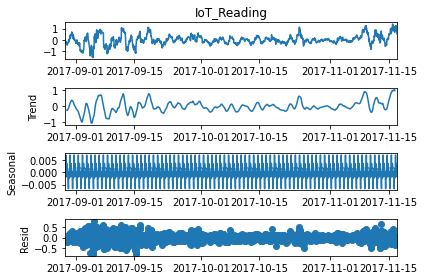

In [55]:
# Naive decomposition
# observed = Trend + Sesonal + Residual
# additive approach is used
additive = seasonal_decompose(df_comp.IoT_Reading, model="additive")
additive.plot()
plt.show()

Observations:

1.  No trend observed (since no increasing / decreasing slope in plot )
2.  Seasonal plot is just a fixed pattern and not repeated pattern.
3.  So we can conclude that no seasonality is observed here

**ACF**

ACF or  auto-correlation function  gives us values of auto-correlation of any series with its lagged values and describes how well the present value of the series is related with its past values. 

A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.




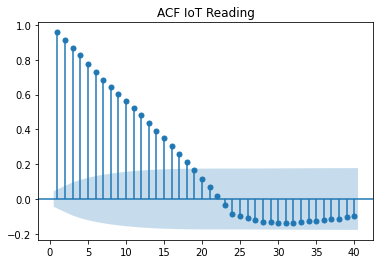

In [56]:
sgt.plot_acf(df_comp.IoT_Reading, lags=40, zero=False)
plt.title("ACF IoT Reading")
plt.show()

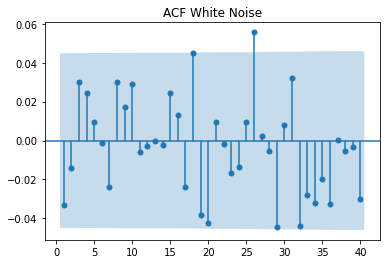

In [57]:
sgt.plot_acf(df_comp.wn, lags=40, zero=False)
plt.title("ACF White Noise")
plt.show()

**PACF**

It finds correlation of the residuals ,which remain after removing the effects which are already explained by the earlier lags.


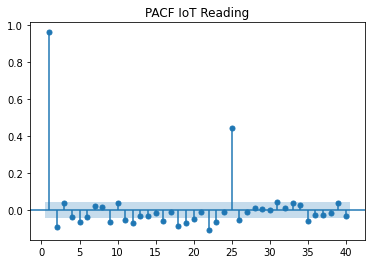

In [58]:
sgt.plot_pacf(df_comp.IoT_Reading, lags=40, zero=False, method=("ols"))
plt.title("PACF IoT Reading")
plt.show()

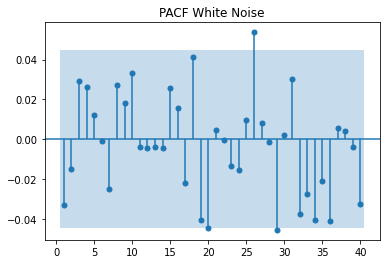

In [59]:
sgt.plot_pacf(df_comp.wn, lags=40, zero=False, method=("ols"))
plt.title("PACF White Noise")
plt.show()

**Autoregressor (AR) Time Series**

* The auto regressive model relies on past period values and past periods only to predict current period values.

* It's a linear model where current period values are a sum of past outcomes multiplied by a numeric factor.

* Value of phi lies between -1 and 1

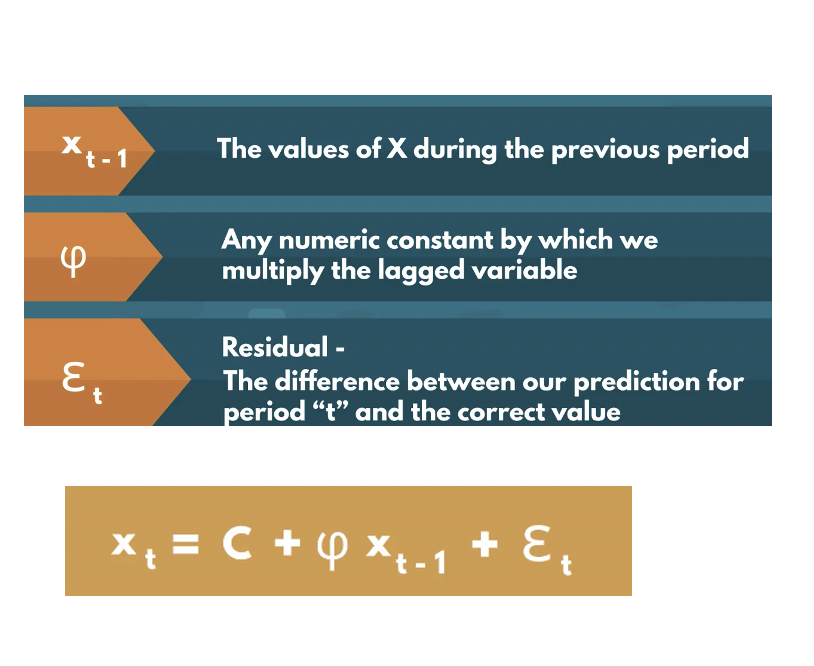

In [60]:
# AR 1
model_ar = ARMA(df_comp.IoT_Reading, order=(1,0))
results_ar = model_ar.fit()
results_ar.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IoT_Reading   No. Observations:                 1910
Model:                     ARMA(1, 0)   Log Likelihood                1376.098
Method:                       css-mle   S.D. of innovations              0.118
Date:                Fri, 15 Jul 2022   AIC                          -2746.195
Time:                        20:02:50   BIC                          -2729.531
Sample:                    08-29-2017   HQIC                         -2740.062
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0027      0.065      0.042      0.967      -0.125       0.130
ar.L1.IoT_Reading     0.9591      0.006    149.124      0.000       0.947       0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0426           +0.0000j            1.0426            0.0000
-----------------------------------------------------------------------------
"""

In [61]:
# AR 2
model_ar_2 = ARMA(df_comp.IoT_Reading, order=(2,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IoT_Reading   No. Observations:                 1910
Model:                     ARMA(2, 0)   Log Likelihood                1383.692
Method:                       css-mle   S.D. of innovations              0.117
Date:                Fri, 15 Jul 2022   AIC                          -2759.384
Time:                        20:02:57   BIC                          -2737.165
Sample:                    08-29-2017   HQIC                         -2751.207
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0017      0.060      0.029      0.977      -0.115       0.119
ar.L1.IoT_Reading     1.0445      0.023     45.846      0.000       1.000       1.089
ar.L2.IoT_Reading    -0.0890      0.023     -3.905      0.000      -0.134      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0517           +0.0000j            1.0517            0.0000
AR.2           10.6828           +0.0000j           10.6828            0.0000
-----------------------------------------------------------------------------
"""

In [62]:
# AR 3
model_ar_3 = ARMA(df_comp.IoT_Reading, order=(3,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IoT_Reading   No. Observations:                 1910
Model:                     ARMA(3, 0)   Log Likelihood                1385.169
Method:                       css-mle   S.D. of innovations              0.117
Date:                Fri, 15 Jul 2022   AIC                          -2760.337
Time:                        20:02:59   BIC                          -2732.563
Sample:                    08-29-2017   HQIC                         -2750.115
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0023      0.062      0.037      0.970      -0.119       0.124
ar.L1.IoT_Reading     1.0480      0.023     45.852      0.000       1.003       1.093
ar.L2.IoT_Reading    -0.1301      0.033     -3.940      0.000      -0.195      -0.065
ar.L3.IoT_Reading     0.0394      0.023      1.719      0.086      -0.006       0.084
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0472           -0.0000j            1.0472           -0.0000
AR.2            1.1275           -4.7916j            4.9225           -0.2132
AR.3            1.1275           +4.7916j            4.9225            0.2132
-----------------------------------------------------------------------------
"""

In [63]:
# AR 4
model_ar_4 = ARMA(df_comp.IoT_Reading, order=(4,0))
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            IoT_Reading   No. Observations:                 1910
Model:                     ARMA(4, 0)   Log Likelihood                1386.641
Method:                       css-mle   S.D. of innovations              0.117
Date:                Fri, 15 Jul 2022   AIC                          -2761.282
Time:                        20:03:01   BIC                          -2727.953
Sample:                    08-29-2017   HQIC                         -2749.016
                         - 11-17-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0016      0.060      0.028      0.978      -0.115       0.118
ar.L1.IoT_Reading     1.0495      0.023     45.920      0.000       1.005       1.094
ar.L2.IoT_Reading    -0.1351      0.033     -4.078      0.000      -0.200      -0.070
ar.L3.IoT_Reading     0.0805      0.033      2.430      0.015       0.016       0.145
ar.L4.IoT_Reading    -0.0394      0.023     -1.717      0.086      -0.084       0.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0519           -0.0000j            1.0519           -0.0000
AR.2           -0.9802           -2.6855j            2.8588           -0.3057
AR.3           -0.9802           +2.6855j            2.8588            0.3057
AR.4            2.9518           -0.0000j            2.9518           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# AR(1) Staionarity

### Log Likelyhood Test

In [64]:
def LLR_test(model_1, model_2, DF=1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [65]:
LLR_test(model_ar, model_ar_2)

0.0

In [66]:
LLR_test(model_ar_2, model_ar_3)

0.086

In [67]:
LLR_test(model_ar_3, model_ar_4)

0.086

In [68]:
df_comp['rolling_mean_IoT_Reading'] = df_comp['IoT_Reading'].rolling(window=24).mean() # Window size is 7 here
df_comp.tail()

,IoT_Reading,wn,rolling_mean_IoT_Reading
time,,,
2017-11-16 20:00:00,1.186376,0.404758,1.051537
2017-11-16 21:00:00,1.182408,0.200880,1.058811
2017-11-16 22:00:00,0.934023,-0.521624,1.044494
2017-11-16 23:00:00,0.572952,-0.349610,1.009742
2017-11-17 00:00:00,0.525338,0.460696,0.975718


In [69]:
df_comp['rolling_mean_IoT_Reading'] = df_comp['IoT_Reading'].rolling(window=24).std() # Window size is 7 here
df_comp.tail()

,IoT_Reading,wn,rolling_mean_IoT_Reading
time,,,
2017-11-16 20:00:00,1.186376,0.404758,0.199033
2017-11-16 21:00:00,1.182408,0.200880,0.200550
2017-11-16 22:00:00,0.934023,-0.521624,0.196473
2017-11-16 23:00:00,0.572952,-0.349610,0.203214
2017-11-17 00:00:00,0.525338,0.460696,0.213290


In [70]:
# Expanding Window

In [71]:
df_comp['rolling_mean_IoT_Reading'] = df_comp['IoT_Reading'].expanding(min_periods=1).mean()
df_comp.rolling_mean_IoT_Reading

time
2017-08-29 11:00:00   -0.015871
2017-08-29 12:00:00   -0.058724
2017-08-29 13:00:00   -0.078563
2017-08-29 14:00:00   -0.112488
2017-08-29 15:00:00   -0.139984
                         ...   
2017-11-16 20:00:00   -0.005176
2017-11-16 21:00:00   -0.004553
2017-11-16 22:00:00   -0.004061
2017-11-16 23:00:00   -0.003759
2017-11-17 00:00:00   -0.003482
Freq: H, Name: rolling_mean_IoT_Reading, Length: 1910, dtype: float64

In [72]:
df_comp['rolling_mean_IoT_Reading'] = df_comp['IoT_Reading'].expanding(min_periods=1).std()
df_comp.rolling_mean_IoT_Reading

time
2017-08-29 11:00:00         NaN
2017-08-29 12:00:00    0.060602
2017-08-29 13:00:00    0.054928
2017-08-29 14:00:00    0.081332
2017-08-29 15:00:00    0.093497
                         ...   
2017-11-16 20:00:00    0.414839
2017-11-16 21:00:00    0.415621
2017-11-16 22:00:00    0.416067
2017-11-16 23:00:00    0.416168
2017-11-17 00:00:00    0.416235
Freq: H, Name: rolling_mean_IoT_Reading, Length: 1910, dtype: float64